In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, \
ExtraTreesClassifier, VotingClassifier, StackingRegressor
from sklearn.metrics import plot_confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score, roc_auc_score, plot_roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

from model import *
import pickle

In [2]:
df = pd.read_csv('./data/training_set_features.csv')
df2 = pd.read_csv('./data/training_set_labels.csv')

In [3]:
df3 = pd.concat([df,df2], axis = 1)

In [5]:
df3.dropna(inplace = True)

In [6]:
X = df3.drop(['respondent_id','race', 'h1n1_vaccine', 'seasonal_vaccine'],
            axis = 1)
y = df3['h1n1_vaccine']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

In [8]:
X_simple = X_train.select_dtypes(np.number)
y_simple = y_train

In [9]:
log_pipe = Pipeline(steps=[('simple_impute', SimpleImputer(strategy='most_frequent')),
                                ('lr', LogisticRegression(random_state=1))]).fit(X_simple,y_simple)

In [10]:
simple_log = ModelWithCV(log_pipe, 'logreg', X_simple, y_simple, cv_now = True)

C:\Users\xiao\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
simple_log.cv_mean

0.8189364829058453

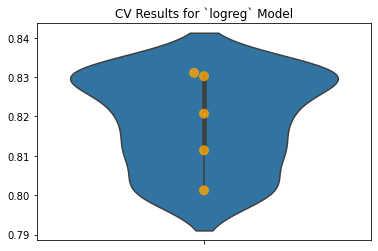

In [13]:
fig, ax = plt.subplots()

ax = simple_log.plot_cv(ax)